#### Data Prep

In [2]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 

#These two modules will be used to create some basic visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#This is a jupyter magic command that embeds the image generated by matplotlib right after the code cell
%matplotlib inline

In [3]:
# read and process the charts dataset
artists_df = pd.read_csv('data/spotify_daily_charts_artists.csv')
#transform date column into a datetime column
#charts_df['date'] = pd.to_datetime(charts_df['date'])
artists_df.head()

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7279217,"['pop', 'talent show', 'uk pop']",86
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,17241689,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",85
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,28845735,"['pop', 'pop rock']",88
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,6407022,"['dance pop', 'pop', 'pop dance', 'post-teen p...",78


In [4]:
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
#charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [5]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,73,0.578,0.574,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,85,0.358,0.557,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,84,0.748,0.524,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,68,0.662,0.586,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,1,0.783,0.623,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [6]:
#merge the charts and tracks dataset
df1 = charts_df.merge(tracks_df, on='track_id', how='left')
#
df1 = df1.drop(columns='track_name_y')
df1 = df1.rename(columns={'track_name_x':'track_name'})
df1.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.574,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.557,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.524,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.586,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.623,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [7]:
#merge the charts and tracks dataset
df = artists_df.merge(df1, on='artist_id', how='left')
#
#df = df.drop(columns='track_name_y')
#df = df.rename(columns={'track_name_x':'track_name'})
df.head()

,artist_id,artist_name_x,total_followers,genres,popularity_x,date,position,track_id,track_name,artist,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,...,0.574,2,-6.209,1,0.0454,0.1960,0.0,0.0830,0.301,174.152
1,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,6,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,...,0.803,1,-4.282,1,0.0797,0.0340,0.0,0.1530,0.632,106.970
2,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,51,0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,Bruno Mars,...,0.560,1,-4.961,1,0.0406,0.0130,0.0,0.0944,0.860,134.066
3,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,92,0mBKv9DkYfQHjdMcw2jdyI,Chunky,Bruno Mars,...,0.539,5,-4.446,0,0.1160,0.0208,0.0,0.1250,0.727,202.103
4,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,130,2mrZYZGmPFV3QOyYPZ1zsn,Straight up & Down,Bruno Mars,...,0.733,3,-6.898,0,0.0933,0.0209,0.0,0.0858,0.643,143.560


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.tail()

,artist_id,artist_name_x,total_followers,genres,popularity_x,date,position,track_id,track_name,artist,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
294595,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,564714,"['pop', 'post-teen pop']",84,2021-01-13,1,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,...,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.132,143.874
294596,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,564714,"['pop', 'post-teen pop']",84,2021-01-14,1,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,...,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.132,143.874
294597,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,564714,"['pop', 'post-teen pop']",84,2021-01-14,174,4Yxc55NX3tAXC2mHRAhtcW,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,...,0.430,0,-6.585,0,0.0328,0.0902,0.000000,0.0912,0.129,77.599
294598,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,564714,"['pop', 'post-teen pop']",84,2021-01-15,1,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,...,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.132,143.874
294599,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,564714,"['pop', 'post-teen pop']",84,2021-01-15,173,4Yxc55NX3tAXC2mHRAhtcW,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,...,0.430,0,-6.585,0,0.0328,0.0902,0.000000,0.0912,0.129,77.599


In [9]:
df['month']=df['date'].dt.month
df.head()

,artist_id,artist_name_x,total_followers,genres,popularity_x,date,position,track_id,track_name,artist,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,...,2,-6.209,1,0.0454,0.1960,0.0,0.0830,0.301,174.152,1
1,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,6,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,...,1,-4.282,1,0.0797,0.0340,0.0,0.1530,0.632,106.970,1
2,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,51,0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,Bruno Mars,...,1,-4.961,1,0.0406,0.0130,0.0,0.0944,0.860,134.066,1
3,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,92,0mBKv9DkYfQHjdMcw2jdyI,Chunky,Bruno Mars,...,5,-4.446,0,0.1160,0.0208,0.0,0.1250,0.727,202.103,1
4,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,130,2mrZYZGmPFV3QOyYPZ1zsn,Straight up & Down,Bruno Mars,...,3,-6.898,0,0.0933,0.0209,0.0,0.0858,0.643,143.560,1


In [10]:
df['year']=df['date'].dt.year
# get day and day of week
df['day']=df['date'].dt.day
df['day_of_week']=df['date'].dt.dayofweek # The day of the week with Monday=0, Sunday=6.
df.head()

,artist_id,artist_name_x,total_followers,genres,popularity_x,date,position,track_id,track_name,artist,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,day,day_of_week
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,...,0.0454,0.1960,0.0,0.0830,0.301,174.152,1,2017,1,6
1,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,6,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,...,0.0797,0.0340,0.0,0.1530,0.632,106.970,1,2017,1,6
2,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,51,0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,Bruno Mars,...,0.0406,0.0130,0.0,0.0944,0.860,134.066,1,2017,1,6
3,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,92,0mBKv9DkYfQHjdMcw2jdyI,Chunky,Bruno Mars,...,0.1160,0.0208,0.0,0.1250,0.727,202.103,1,2017,1,6
4,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,28322108,"['dance pop', 'pop']",88,2017-01-01,130,2mrZYZGmPFV3QOyYPZ1zsn,Straight up & Down,Bruno Mars,...,0.0933,0.0209,0.0,0.0858,0.643,143.560,1,2017,1,6


In [11]:
pinoy_indie = df[df['genres'].str.contains("pinoy indie")]
pinoy_indie.head()

,artist_id,artist_name_x,total_followers,genres,popularity_x,date,position,track_id,track_name,artist,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,day,day_of_week
46565,3wbCeEPAW6po7J46netxMT,Up Dharma Down,640750,"['opm', 'pinoy indie', 'pinoy reggae', 'pinoy ...",59,2017-01-01,46,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,...,0.0369,0.165,0.0296,0.0809,0.511,155.982,1,2017,1,6
46566,3wbCeEPAW6po7J46netxMT,Up Dharma Down,640750,"['opm', 'pinoy indie', 'pinoy reggae', 'pinoy ...",59,2017-01-01,55,3T8yMLawoliJaN1hAGFFmv,Sigurado,Up Dharma Down,...,0.0385,0.295,0.0271,0.1110,0.963,113.010,1,2017,1,6
46567,3wbCeEPAW6po7J46netxMT,Up Dharma Down,640750,"['opm', 'pinoy indie', 'pinoy reggae', 'pinoy ...",59,2017-01-02,46,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,...,0.0369,0.165,0.0296,0.0809,0.511,155.982,1,2017,2,0
46568,3wbCeEPAW6po7J46netxMT,Up Dharma Down,640750,"['opm', 'pinoy indie', 'pinoy reggae', 'pinoy ...",59,2017-01-02,58,3T8yMLawoliJaN1hAGFFmv,Sigurado,Up Dharma Down,...,0.0385,0.295,0.0271,0.1110,0.963,113.010,1,2017,2,0
46569,3wbCeEPAW6po7J46netxMT,Up Dharma Down,640750,"['opm', 'pinoy indie', 'pinoy reggae', 'pinoy ...",59,2017-01-03,43,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,...,0.0369,0.165,0.0296,0.0809,0.511,155.982,1,2017,3,1


In [12]:
pinoy_rock = df[df['genres'].str.contains("pinoy rock")]
pinoy_rock.head()

,artist_id,artist_name_x,total_followers,genres,popularity_x,date,position,track_id,track_name,artist,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,day,day_of_week
33897,0jKQrxK2zHqxyOAyIMrUQt,SUD,282587,"['opm', 'pinoy rock']",56,2017-01-01,25,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,...,0.0457,0.0104,0.0,0.109,0.28,124.57,1,2017,1,6
33898,0jKQrxK2zHqxyOAyIMrUQt,SUD,282587,"['opm', 'pinoy rock']",56,2017-01-02,24,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,...,0.0457,0.0104,0.0,0.109,0.28,124.57,1,2017,2,0
33899,0jKQrxK2zHqxyOAyIMrUQt,SUD,282587,"['opm', 'pinoy rock']",56,2017-01-03,24,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,...,0.0457,0.0104,0.0,0.109,0.28,124.57,1,2017,3,1
33900,0jKQrxK2zHqxyOAyIMrUQt,SUD,282587,"['opm', 'pinoy rock']",56,2017-01-04,24,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,...,0.0457,0.0104,0.0,0.109,0.28,124.57,1,2017,4,2
33901,0jKQrxK2zHqxyOAyIMrUQt,SUD,282587,"['opm', 'pinoy rock']",56,2017-01-05,24,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,...,0.0457,0.0104,0.0,0.109,0.28,124.57,1,2017,5,3


In [13]:
pinoy_rock.columns

Index(['artist_id', 'artist_name_x', 'total_followers', 'genres',
       'popularity_x', 'date', 'position', 'track_id', 'track_name', 'artist',
       'streams', 'artist_name_y', 'album_id', 'duration', 'release_date',
       'popularity_y', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'month', 'year', 'day', 'day_of_week'],
      dtype='object')

In [14]:
# TOP 10 PINOY INDIE ARTISTS IN TOP 200

pinoy_indie['artist'].value_counts()[:20]

IV Of Spades           1604
Up Dharma Down         1562
I Belong to the Zoo    1518
Orange & Lemons        1070
juan karlos             999
Join The Club           622
Unique Salonga          520
Alisson Shore           459
Arthur Nery             334
Leanne & Naara          240
Reneé Dominique         202
Rob Deniel              110
Ace Banzuelo             29
Midnight Meetings        21
Reese Lansangan          11
Paolo Sandejas            7
Kiana V                   3
Gracenote                 3
Autotelic                 2
Clara Benin               1
Name: artist, dtype: int64

In [15]:
pinoy_indie.groupby('artist')[['streams']].sum().sort_values(by='streams',ascending=False)

,streams
artist,
I Belong to the Zoo,155143287
IV Of Spades,108874780
juan karlos,83005953
Up Dharma Down,77975277
Orange & Lemons,38638323
Join The Club,29601661
Unique Salonga,22699801
Arthur Nery,18130011
Alisson Shore,14157978


In [16]:
# TOP 10 PINOY ROCK ARTISTS IN TOP 200

pinoy_rock['artist'].value_counts()[:20]

Silent Sanctuary       3800
Hale                   3033
Callalily              2110
Parokya Ni Edgar       1897
SUD                    1885
Eraserheads            1688
Moonstar88             1595
Up Dharma Down         1562
I Belong to the Zoo    1518
Orange & Lemons        1070
6cyclemind              779
Join The Club           622
Rivermaya               504
Mayonnaise              495
Kamikazee               493
Itchyworms              224
Imago                   210
Agsunta                  72
Sponge Cola              10
Ebe Dancel                5
Name: artist, dtype: int64

In [17]:
pinoy_indie['streams'].describe()

count      9317.000000
mean      62113.085328
std       50384.350792
min       11319.000000
25%       31118.000000
50%       46365.000000
75%       68008.000000
max      371140.000000
Name: streams, dtype: float64

In [18]:
pinoy_rock['streams'].describe()

count     23581.000000
mean      40060.237098
std       26183.745827
min       11341.000000
25%       26081.000000
50%       33246.000000
75%       44209.000000
max      264775.000000
Name: streams, dtype: float64

In [19]:
# PINOY INDIE TOTAL STREAMS PER YEAR

pinoy_indie.groupby('year')[['streams']].sum()

,streams
year,
2017,26568352
2018,168357581
2019,249929437
2020,128625661
2021,5226585


In [20]:
# PINOY ROCK TOTAL STREAMS PER YEAR

pinoy_rock.groupby('year')[['streams']].sum()

,streams
year,
2017,165854477
2018,266125733
2019,332835508
2020,173060038
2021,6784695


In [21]:
# TOP 10 PINOY ROCK STREAMED SONGS

pinoy_rock.groupby(['track_id','track_name'])['streams'].sum().sort_values(ascending=False)[:10]

track_id                track_name                        
1X4l4i472kW5ofFP8Xo0x0  Sana                                  110154005
6NFKf8vBApSvtzkapYmnVR  Tadhana                                74911092
0YyM8aEdbjGfLWPn6fdcn7  Pasensya Ka Na                         55579511
7sW3f7PqDV7BQ7qqeVBJIA  Migraine                               50266057
4JSDhJVmo2UqdF7nxbyenn  Kung Wala Ka                           49820654
2IMODbij0lZ5CuAjZi0IDE  Sila                                   49377992
3OpGUlDmRUXh0NkIYWoIlD  Your Song                              46035863
5NXdUJ3Z2jhlp2u1cj6f7m  Balang Araw                            44989282
135ggzbjOogZ75IQ0LQi8r  Ang Huling El Bimbo                    41893568
5UhpceEr5XmbVwyoIUIRnh  Hanggang Kailan - Umuwi Ka Na Baby     38638323
Name: streams, dtype: int64

In [22]:
# TOP 10 PINOY INDIE STREAMED SONGS

pinoy_indie.groupby(['track_id','track_name'])['streams'].sum().sort_values(ascending=False)[:10]

track_id                track_name                        
1X4l4i472kW5ofFP8Xo0x0  Sana                                  110154005
4u8RkgV6P4TLi89SmlUtv8  Mundo                                  89710226
5f9808hpiCpuNyqqdXmpF2  Buwan                                  77272981
6NFKf8vBApSvtzkapYmnVR  Tadhana                                74911092
5NXdUJ3Z2jhlp2u1cj6f7m  Balang Araw                            44989282
5UhpceEr5XmbVwyoIUIRnh  Hanggang Kailan - Umuwi Ka Na Baby     38638323
3vGkyQlCw8LklNip0ZUELC  Nobela                                 29601661
63qA4ydokzNOFpsaNlsYsC  Higa                                   15125162
5eFzCfsj3d0yWumdEldZwL  Midnight Sky                           14869764
2KoWHNtJrbE0WxWfQjYjyu  Urong Sulong                           12744699
Name: streams, dtype: int64

In [23]:
# FREQUENCY OF PINOY INDIE SONGS IN TOP 200 BY YEAR

pinoy_indie.groupby('year')['track_name'].size()

year
2017     504
2018    2170
2019    3465
2020    3071
2021     107
Name: track_name, dtype: int64

In [24]:
# FREQUENCY OF PINOY ROCK SONGS IN TOP 200 BY YEAR

pinoy_rock.groupby('year')['track_name'].size()

year
2017    4561
2018    7185
2019    6919
2020    4739
2021     177
Name: track_name, dtype: int64

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


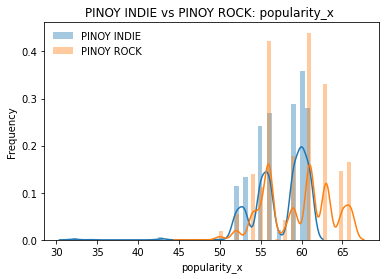

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


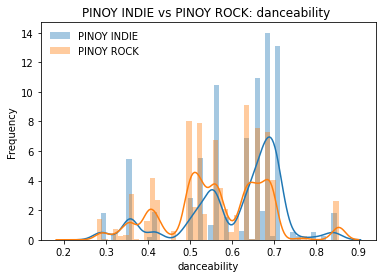

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


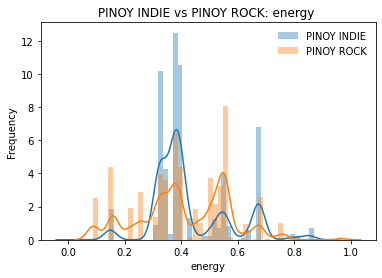

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


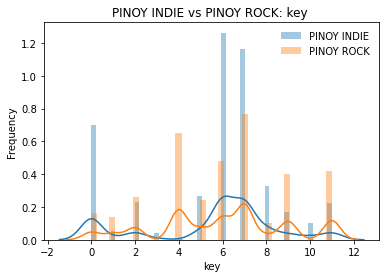

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


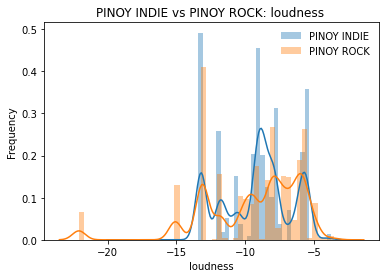

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


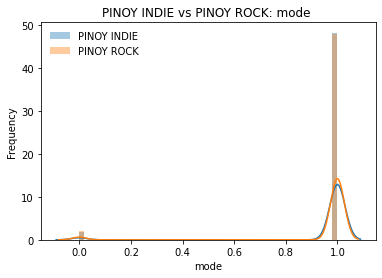

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


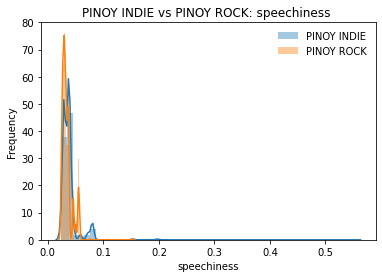

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


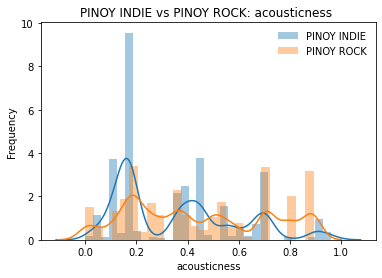

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


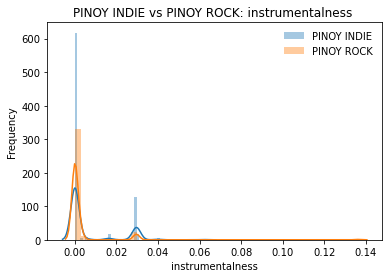

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


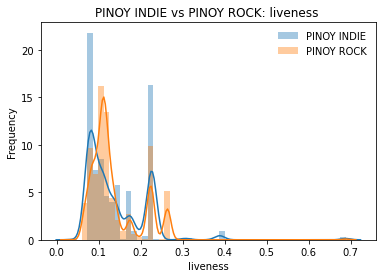

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


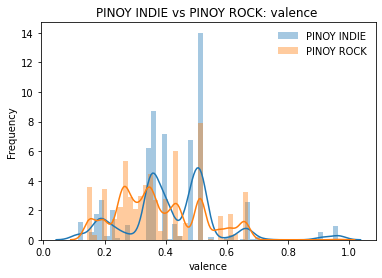

C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatima Santos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


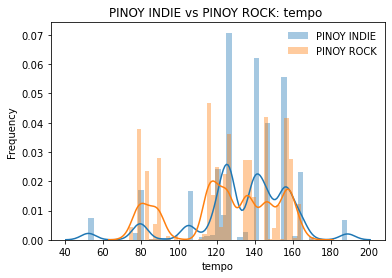

In [25]:
for col in ['popularity_x', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(pinoy_indie[col], ax=ax, label= 'PINOY INDIE')
    sns.distplot(pinoy_rock[col], ax=ax, label= 'PINOY ROCK')
    plt.title("%s vs %s: %s " % ('PINOY INDIE','PINOY ROCK',col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()

In [26]:
df[df['artist'] == "IV Of Spades"]['streams'].sum()

108874780

In [46]:
df[df['artist'] == "Up Dharma Down"]['streams'].sum()

77975277

In [27]:
df[df['artist'] == "I Belong to the Zoo"]['streams'].sum()

155143287

In [28]:
df[df['artist'] == "Silent Sanctuary"]['streams'].sum()

136866048

In [29]:
df[df['artist'] == "Hale"]['streams'].sum()

104943404

In [30]:
df[df['artist'] == "Callalily"]['streams'].sum()

77851978

In [46]:
df[df['artist'] == 'Hale']

,artist_id,artist_name_x,total_followers,genres,popularity_x,date,position,track_id,track_name,artist,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,day,day_of_week
124649,6Ww3OMFzCaO33ulKh1LBFN,Hale,550274,"['opm', 'pinoy reggae', 'pinoy rock']",61,2017-01-01,189,6CHpr3pY2MbJ5y1076UDnI,The Day You Said Goodnight - Acoustic Version,Hale,...,0.0351,0.882,0.00000,0.134,0.299,125.964,1,2017,1,6
124650,6Ww3OMFzCaO33ulKh1LBFN,Hale,550274,"['opm', 'pinoy reggae', 'pinoy rock']",61,2017-01-02,176,6CHpr3pY2MbJ5y1076UDnI,The Day You Said Goodnight - Acoustic Version,Hale,...,0.0351,0.882,0.00000,0.134,0.299,125.964,1,2017,2,0
124651,6Ww3OMFzCaO33ulKh1LBFN,Hale,550274,"['opm', 'pinoy reggae', 'pinoy rock']",61,2017-01-03,160,6CHpr3pY2MbJ5y1076UDnI,The Day You Said Goodnight - Acoustic Version,Hale,...,0.0351,0.882,0.00000,0.134,0.299,125.964,1,2017,3,1
124652,6Ww3OMFzCaO33ulKh1LBFN,Hale,550274,"['opm', 'pinoy reggae', 'pinoy rock']",61,2017-01-04,160,6CHpr3pY2MbJ5y1076UDnI,The Day You Said Goodnight - Acoustic Version,Hale,...,0.0351,0.882,0.00000,0.134,0.299,125.964,1,2017,4,2
124653,6Ww3OMFzCaO33ulKh1LBFN,Hale,550274,"['opm', 'pinoy reggae', 'pinoy rock']",61,2017-01-05,170,6CHpr3pY2MbJ5y1076UDnI,The Day You Said Goodnight - Acoustic Version,Hale,...,0.0351,0.882,0.00000,0.134,0.299,125.964,1,2017,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127677,6Ww3OMFzCaO33ulKh1LBFN,Hale,550274,"['opm', 'pinoy reggae', 'pinoy rock']",61,2021-01-13,107,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,...,0.0323,0.492,0.00000,0.116,0.251,134.263,1,2021,13,2
127678,6Ww3OMFzCaO33ulKh1LBFN,Hale,550274,"['opm', 'pinoy reggae', 'pinoy rock']",61,2021-01-14,101,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,...,0.0323,0.492,0.00000,0.116,0.251,134.263,1,2021,14,3
127679,6Ww3OMFzCaO33ulKh1LBFN,Hale,550274,"['opm', 'pinoy reggae', 'pinoy rock']",61,2021-01-14,105,4JSDhJVmo2UqdF7nxbyenn,Kung Wala Ka,Hale,...,0.0263,0.710,0.00222,0.108,0.152,136.427,1,2021,14,3
127680,6Ww3OMFzCaO33ulKh1LBFN,Hale,550274,"['opm', 'pinoy reggae', 'pinoy rock']",61,2021-01-15,106,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,...,0.0323,0.492,0.00000,0.116,0.251,134.263,1,2021,15,4
